This dataset is about predicting whether a customer will change telecommunications provider, something known as "churning".

**19 fitures and 1 target variable are**:

"**state**", string. 2-letter code of the US state of customer residence.

"**account_length**", numerical. Number of months the customer has been with the current telco provider.

"**area_code**", string="area_code_AAA" where AAA = 3 digit area code.

"**international_plan**", (yes/no). The customer has international plan.

"**voice_mail_plan**", (yes/no). The customer has voice mail plan.

"**number_vmail_messages**", numerical. Number of voice-mail messages.

"**total_day_minutes**", numerical. Total minutes of day calls.

"**total_day_calls**", numerical. Total minutes of day calls.

"**total_day_charge**", numerical. Total charge of day calls.

"**total_eve_minutes**", numerical. Total minutes of evening calls.

"**total_eve_calls**", numerical. Total number of evening calls.

"**total_eve_charge**", numerical. Total charge of evening calls.

"**total_night_minutes**", numerical. Total minutes of night calls.

"**total_night_calls**", numerical. Total number of night calls.

"**total_night_charge**", numerical. Total charge of night calls.

"**total_intl_minutes**", numerical. Total minutes of international calls.

"**total_intl_calls**", numerical. Total number of international calls.

"**total_intl_charge**", numerical. Total charge of international calls

"**number_customer_service_calls**", numerical. Number of calls to customer service

"**churn**", (yes/no). Customer churn - target variable.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/sample/telecom_churn.csv')
df.head()


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


По умолчанию Pandas выводит 20 столбцов и 60 строк. Настроим опцию вывода таблицы 100х100

In [ ]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [ ]:
print(df.shape)

(3333, 20)


In [ ]:
print(df.columns)


Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')


Посмотрим общую информацию по датафрейму:

In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

Изменим тип колонки на числовой.

In [ ]:
df['Churn'] = df['Churn'].astype('int64')

Покажем основные статистические характеристики данных по каждому числовому признаку.

In [ ]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


Статистика по нечисловым типам показателей

In [ ]:
df.describe(include = ['object', 'bool'])

,State,International plan,Voice mail plan,Churn
count,3333,3333,3333,3333
unique,51,2,2,2
top,WV,No,No,False
freq,106,3010,2411,2850


Смотрим целевой параметр "Отток клиентов" (Churn): 0 - лояльный клиент, 1 - клиент потерян.

In [ ]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

Посмотрим на распределение пользователей по переменной Area code. Чтобы посмотреть относительные частоты, укажем значение параметра normalize=True.

In [ ]:
df['Area code'].value_counts(normalize=True)

415    0.496550
510    0.252025
408    0.251425
Name: Area code, dtype: float64

Отсортируем по убыванию признака Total day charge (кто больше всего платит за дневные разговоры).

In [ ]:
df.sort_values(by = 'Total day charge', ascending = False).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
365,CO,154,415,No,No,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
985,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2594,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
156,OH,83,415,No,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
605,MO,112,415,No,No,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1


Сортировка по группе столбцов (кто платит за дневные разговоры больше всего, но не сменил оператора).

In [ ]:
df.sort_values(by = ['Churn', 'Total day charge'], ascending = [True, False]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
688,MN,13,510,No,Yes,21,315.6,105,53.65,208.9,71,17.76,260.1,123,11.70,12.1,3,3.27,3,False
2259,NC,210,415,No,Yes,31,313.8,87,53.35,147.7,103,12.55,192.7,97,8.67,10.1,7,2.73,3,False
534,LA,67,510,No,No,0,310.4,97,52.77,66.5,123,5.65,246.5,99,11.09,9.2,10,2.48,4,False
575,SD,114,415,No,Yes,36,309.9,90,52.68,200.3,89,17.03,183.5,105,8.26,14.2,2,3.83,1,False
2858,AL,141,510,No,Yes,28,308.0,123,52.36,247.8,128,21.06,152.9,103,6.88,7.4,3,2.00,1,False



**Какова доля нелояльных пользователей?**

Извлечение отдельного значения показателя (средний отток людей)

In [ ]:
df['Churn'].mean() # выводит: 0.14491449144914492

0.14491449144914492

Средние показатели для нелояльных клиентов (Отток=1, клиент ушел)

In [ ]:
df[df['Churn'] == 1].mean()

<ipython-input-14-e4d5095cd43f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['Churn'] == 1].mean()


Account length            102.664596
Area code                 437.817805
Number vmail messages       5.115942
Total day minutes         206.914079
Total day calls           101.335404
Total day charge           35.175921
Total eve minutes         212.410145
Total eve calls           100.561077
Total eve charge           18.054969
Total night minutes       205.231677
Total night calls         100.399586
Total night charge          9.235528
Total intl minutes         10.700000
Total intl calls            4.163561
Total intl charge           2.889545
Customer service calls      2.229814
Churn                       1.000000
dtype: float64

Скомбинировав предыдущие два вида индексации, узнаем **среднее время дневных разговоров нелояльных клиентов.**

In [ ]:
df[df['Churn'] == 1]['Total day minutes'].mean() # выводит: 206.91407867494814

206.91407867494814

Выведем максимальную длину международных звонков среди лояльных клиетов (Churn == 0), которые не пользуются услугой "Международный роуминг" ('International plan' == 'No')

In [ ]:
df[(df['Churn'] == 0)&(df['International plan'] == 'No')]['Total intl minutes'].max() # выводит: 18.899999999999999 

18.9

Срезы столбцов от 'State' до 'Area code'.

In [ ]:
df.loc[0:5, 'State':'Area code']

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


Срезы первых пяти строк в первых трёх столбцах.

In [ ]:
df.iloc[0:5, 0:3]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415


Первая или последняя строчки

In [ ]:
df[:1]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0


In [ ]:
df[-1:]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.6,241.4,77,10.86,13.7,4,3.7,0,0


Применение функции к каждому столбцу: apply

In [ ]:
df.apply(np.max)

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes       395.0
Total night calls           175
Total night charge        17.77
Total intl minutes         20.0
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                         1
dtype: object

Применение функции к каждой ячейке столбца: map  (замена значений в колонке с использованием словаря d - dictionary)

In [ ]:
d = {'No':False, 'Yes': True}
df['International plan'] = df['International plan'].map(d)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Замена значений с помощью метода replace

In [ ]:
df = df.replace({'Voice mail plan': d})
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


**Группируем данные** в зависимости от значения признака Churn и
выводим статистику по трём столбцам в каждой группе.

In [ ]:
from numpy.lib.function_base import percentile
from pandas.core.groupby import groupby
columns_to_show = ['Total day minutes', 'Total eve minutes', 'Total night minutes']
df.groupby(['Churn'])[columns_to_show].describe(percentiles = [])

Total day minutes                                            \
                  count        mean        std  min    50%    max   
Churn                                                               
False            2850.0  175.175754  50.181655  0.0  177.2  315.6   
True              483.0  206.914079  68.997792  0.0  217.6  350.8   

      Total eve minutes                                             \
                  count        mean        std   min    50%    max   
Churn                                                                
False            2850.0  199.043298  50.292175   0.0  199.6  361.8   
True              483.0  212.410145  51.728910  70.9  211.3  363.7   

      Total night minutes                                              
                    count        mean        std   min     50%    max  
Churn                                                                  
False              2850.0  200.133193  51.105032  23.2  200.25  395.0  
True                483.0  205.231677  47.132825  47.4  204.80  354.9

Группировка и вывод перечисленных статистик с помощью **agg**

In [ ]:
from numpy.ma.core import std
columns_to_show = ['Total day minutes', 'Total eve minutes', 'Total night minutes']
df.groupby(['Churn'])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

Total day minutes                        Total eve minutes             \
                   mean        std amin   amax              mean        std   
Churn                                                                         
False        175.175754  50.181655  0.0  315.6        199.043298  50.292175   
True         206.914079  68.997792  0.0  350.8        212.410145  51.728910   

                   Total night minutes                          
       amin   amax                mean        std  amin   amax  
Churn                                                           
False   0.0  361.8          200.133193  51.105032  23.2  395.0  
True   70.9  363.7          205.231677  47.132825  47.4  354.9

**Сводные таблицы**

Чтобы посмотреть **распределение значений в выборке** по двум признакам Churn и International plan,построим **таблицу сопряженности методом crosstab**:


In [ ]:
pd.crosstab(df['Churn'], df['International plan'],normalize=False)

International plan,No,Yes
Churn,,
False,2664,186
True,346,137


In [ ]:
pd.crosstab(df['Churn'], df['International plan'], normalize=True)

International plan,No,Yes
Churn,,
False,0.79928,0.055806
True,0.10381,0.041104


Cреднее число дневных, вечерних и ночных звонков для
разных Area code:

In [ ]:
df.pivot_table(['Total day calls', 'Total eve calls', 'Total night calls'], ['Area code'], aggfunc = 'mean').head(10)

,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.496420,99.788783,99.039379
415,100.576435,100.503927,100.398187
510,100.097619,99.671429,100.601190


**Преобразование данных**. 

Посчитаем общее количество звонков для всех
пользователей. Создадим объект total_calls типа Series и вставим его в датафрейм:

In [ ]:
total_calls = df['Total day calls'] + df['Total eve calls'] + df['Total night calls'] + df['Total intl calls'] 
df.insert(loc = len(df.columns), column = 'Total calls', value=total_calls)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,303
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,332
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,333
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,255
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,359


Другой способ добавить столбец 

In [ ]:
df['Total charge'] = df['Total day charge'] + df['Total eve charge'] + df['Total night charge'] + df['Total intl charge']
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls,Total charge
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,303,75.56
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,332,59.24
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,333,62.29
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,255,66.80
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,359,52.09


**Удаление столбцов или строк**. 

**Метод drop**  требует значение параметра axis (1, если удаляете столбцы, и ничего или 0, если удаляете строки):


In [ ]:
# удаление созданного столбца
df = df.drop(['Total calls'], axis=1)

In [ ]:
# удаление строк
df.drop([1,2]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,75.56
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,66.80
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,52.09
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False,67.61
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False,78.31


Посмотрим, как связан отток пользователей (Churn) с признаком "Подключение международного роуминга" (International plan). 

Построим таблицы сопряженности по 2 параметрам: True - относительная (сумма всех = 1) и False - абсолютная частота встреч значений.

In [ ]:
pd.crosstab(df['Churn'], df['Voice mail plan'], normalize = False)

Voice mail plan,No,Yes
Churn,,
False,2008,842
True,403,80


In [ ]:
pd.crosstab(df['Churn'], df['International plan'], normalize = False)

International plan,No,Yes
Churn,,
False,2664,186
True,346,137


In [ ]:
pd.crosstab(df['Churn'], df['Voice mail plan'], normalize = True)

Voice mail plan,No,Yes
Churn,,
False,0.602460,0.252625
True,0.120912,0.024002


In [ ]:
pd.crosstab(df['Churn'], df['International plan'], normalize = False)

International plan,No,Yes
Churn,,
False,2664,186
True,346,137


Выведем среднее значение показателей, соответствующее исследуемому параметру Area code, в сводную таблицу

In [ ]:
df.pivot_table(['Total day calls', 'Total eve calls', 'Total night calls'], ['Area code'],aggfunc='mean').head(10)

,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.496420,99.788783,99.039379
415,100.576435,100.503927,100.398187
510,100.097619,99.671429,100.601190


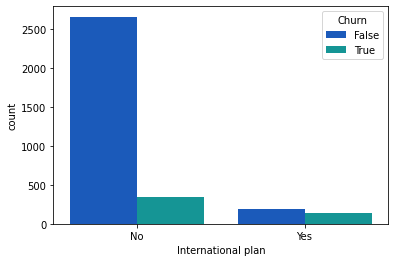

In [ ]:
import seaborn as sns
ax=sns.countplot(x = 'International plan', hue = 'Churn', palette = 'winter', data = df)

**Вывод**: доля оттока резко возрастает, когда роуминг подключен. Возможно, большие и плохо контролируемые траты в роуминге приводят к недовольству и оттоку пользователей.


Далее посмотрим на еще один важный признак – "Число обращений в сервисный центр" (Customer service calls). Построим сводную таблицу и визуализацию в Seaborn

In [ ]:
pd.crosstab(df['Churn'], df['Customer service calls'], margins = True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
False,605,1059,672,385,90,26,8,4,1,0,2850
True,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


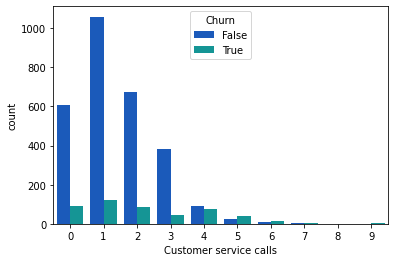

In [ ]:
ax=sns.countplot(x = 'Customer service calls', hue = 'Churn', palette='winter', data = df)

На графике видно, как доля оттока сильно возрастает, начиная с 4 звонков в сервисный центр.

Добавляем бинарный признак - результат сравнения Customer service calls > 3.

In [ ]:
df['Many_service_calls'] = (df['Customer service calls'] > 3).astype('int')
pd.crosstab(df["Many_service_calls"], df['Churn'], margins = True)

Churn,False,True,All
Many_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


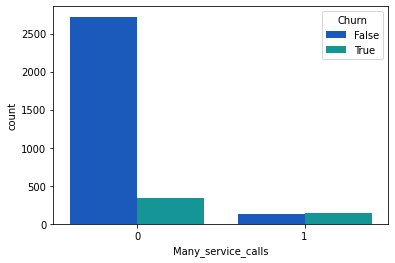

In [ ]:
ax=sns.countplot(x = 'Many_service_calls', hue = 'Churn', palette = 'winter', data = df)

In [ ]:
import plotly.express as px

In [ ]:
px.scatter(df, x = 'Total charge', y = 'Customer service calls', color = 'Churn')

По распределению количества звонков и общей платы можно увидеть 2 зоны, характеризующие недовольство (отток) пользователей: 1) количество звонков больше 3 при небольшой общей плате (до 60); 2) при общей плате от 74 и выше (с 80 процент лояльных клиентов совсем небольшой)

In [ ]:
df['Excellent charge'] = (df['Total charge'] > 74).astype('int')
pd.crosstab(df['Excellent charge'], df['Churn'], margins = True)

Churn,False,True,All
Excellent charge,,,
0,2779,276,3055
1,71,207,278
All,2850,483,3333


При гипотезе: общая плата больше 74 не устраивает клиентов и они уходят, ошибка попаданий равна 10.4% (276+71 из 3333), соответственно правильных попаданий 89,6%. Платить больше 74 не готовы 207 клиентов (42.8% от всего оттока). Соответственно нужно придумывать более дешевые тарифы и уточнять за счет чего получается большая оплата.

In [ ]:
from pandas import DataFrame

In [ ]:
columns_num = DataFrame(df,columns=['Total day minutes', 'Total day calls', 'Total day charge', 'Customer service calls', 'Churn'])

In [ ]:
px.histogram(df, x = 'Customer service calls', color='Churn')

In [ ]:
px.histogram(df, x = 'Account length', color='Churn')

In [ ]:
px.histogram(df, x = 'State', color='Churn',)

In [ ]:
pd.crosstab(df['Churn'],df['State'], normalize = False)

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,49,72,44,60,25,57,62,49,52,55,46,50,41,64,53,62,57,51,47,54,53,49,57,69,56,51,54,57,56,56,47,50,56,52,68,68,52,67,37,59,46,52,48,54,62,72,65,52,71,96,68
True,3,8,11,4,9,9,12,5,9,8,8,3,3,9,5,9,13,8,4,11,17,13,16,15,7,14,14,11,6,5,9,18,6,14,15,10,9,11,8,6,14,8,5,18,10,5,8,14,7,10,9


Из нелояльных локаций отметим NJ, TX (18 клиентов - 36 и 33%), MD (17 - 32%), что превышает средний процент оттока в 2 раза.

In [ ]:
px.box(df, x = "Total day charge", y = "Customer service calls", orientation = "h", color = "Churn", notched = True,
       )

Распределие лояльных и нелояльных клиентов: зона перекрытия при звонках (до 3 включительно) больше. Начиная с 4 звонков зона перекрытия практически отсутствует и недовольство не имеет отношения к дневной плате, т.к. нелояльные клиенты платят меньше. (Предположение: возможно более дешевый тариф имеет ограничение по количеству времени).

<AxesSubplot:xlabel='Total day charge', ylabel='Count'>

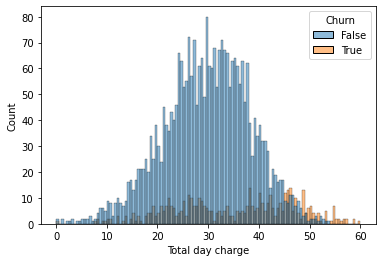

In [ ]:
sns.histplot(data = df, x = "Total day charge", binwidth = 0.5, hue = "Churn")

<AxesSubplot:xlabel='Total eve charge', ylabel='Count'>

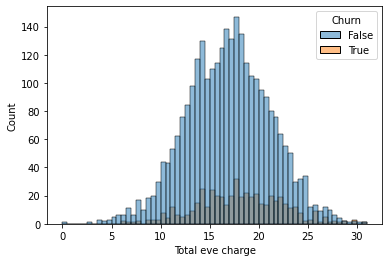

In [ ]:
sns.histplot(data = df, x = "Total eve charge", binwidth = 0.5, hue = "Churn")

<AxesSubplot:xlabel='Total night charge', ylabel='Count'>

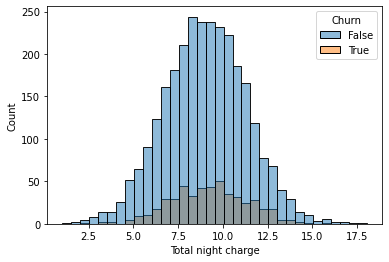

In [ ]:
sns.histplot(data = df, x = "Total night charge", binwidth = 0.5, hue = "Churn")

Выше представлены гистограммы зависимости лояльности и платы в разное время суток. На них можно заметить, что вечером и ночью распределение носит "нормальный" характер, а в дневное время возрастание платы приводит к оттоку почти половины клиентов.

<AxesSubplot:xlabel='Total day minutes', ylabel='Count'>

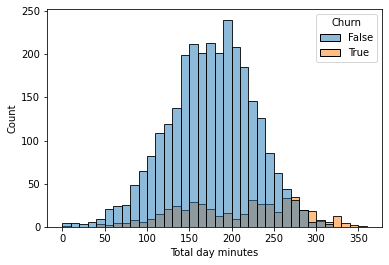

In [ ]:
sns.histplot(data = df, x = "Total day minutes", binwidth = 10, hue = "Churn")

<AxesSubplot:xlabel='Total eve minutes', ylabel='Count'>

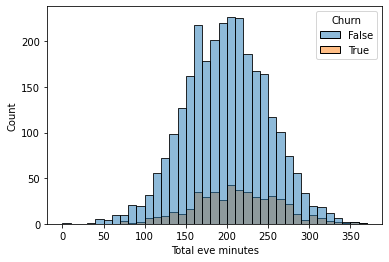

In [ ]:
sns.histplot(data = df, x = "Total eve minutes", binwidth = 10, hue = "Churn")

<AxesSubplot:xlabel='Total night minutes', ylabel='Count'>

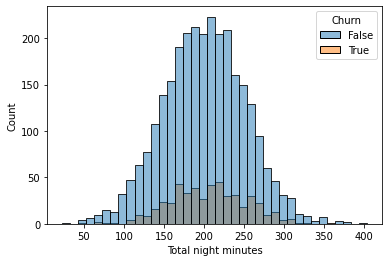

In [ ]:
sns.histplot(data = df, x = "Total night minutes", binwidth=10, hue = "Churn")

**ВЫВОД:** Наблюдается максимальный отток пользователей, которым нужно много разговаривать в дневное время (по работе, например). Т.е. чем больше минут тратит клиент, и, следовательно, чем дороже выходит для него услуга (если тариф небезлимитный), тем больше клиентов отказывается от разговоров по телефону. 



**РЕКОМЕНДАЦИЯ:**  ввести тариф с фиксированной платой 40 и безлимитов звонков, начиная с 220 минут. 